# Lasso regression analysis - Assignment Week 3

To do's: This week’s assignment involves running a lasso regression analysis. Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. Variables with a regression coefficient equal to zero after the shrinkage process are excluded from the model. Variables with non-zero regression coefficients variables are most strongly associated with the response variable. Explanatory variables can be either quantitative, categorical or both.

Your assignment is to run a lasso regression analysis using k-fold cross validation to identify a subset of predictors from a larger pool of predictor variables that best predicts a quantitative response variable.

Lasso regression analysis performed with the Gapminder dataset is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. Variables with a regression coefficient equal to zero after the shrinkage process are excluded from the model. Variables with non-zero regression coefficients variables are most strongly associated with the response variable. Explanatory variables can be either quantitative, categorical or both. 

In [77]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

In [78]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

## Build model on training data


In [79]:
from sklearn.linear_model import LassoLarsCV

## Data Management: Loading the GapMinder dataset 

In [80]:
def primary_clean(df, nan_subset = []):
    df = df.rename(columns=lambda x: x.strip()) #remove whitespaces from headers
    #delete all column with just NaN
    df = df.dropna(axis=1, how='all')
    #drop duplicates
    df = df.drop_duplicates()
    #drop compliance = NaN
    df = df.dropna(subset=nan_subset)
    #convert to numeric our objects
    df[nan_subset] = df[nan_subset].apply(pd.to_numeric, errors='coerce')
    return df

In [81]:
dfgm = pd.read_csv('gapminder.csv')

In [82]:
dfgm.dtypes

country                 object
incomeperperson         object
alcconsumption          object
armedforcesrate         object
breastcancerper100th    object
co2emissions            object
femaleemployrate        object
hivrate                 object
internetuserate         object
lifeexpectancy          object
oilperperson            object
polityscore             object
relectricperperson      object
suicideper100th         object
employrate              object
urbanrate               object
dtype: object

## Set my Features

In [83]:
#features to be convert to numeric
predictors = ['alcconsumption', 'armedforcesrate',  'co2emissions', 'femaleemployrate',
              'hivrate', 'lifeexpectancy', 'polityscore', 'suicideper100th', 'employrate', 'urbanrate']
other = ['breastcancerper100th']

In [84]:
other.extend(predictors)
dfgm = primary_clean(dfgm, other)

In [85]:
dfgm.dtypes

country                  object
incomeperperson          object
alcconsumption          float64
armedforcesrate         float64
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                 float64
internetuserate          object
lifeexpectancy          float64
oilperperson             object
polityscore             float64
relectricperperson       object
suicideper100th         float64
employrate              float64
urbanrate               float64
dtype: object

## Set Features Dataframe and Target

In [86]:
dfpredict = dfgm_clean[predictors]
targets = dfgm_clean.breastcancerper100th

In [87]:
scaler = preprocessing.StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(dfpredict), columns=dfpredict.columns)
df_scaled.describe()


dfgm.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,0.03,0.569653,26.8,7.594400e+07,25.600000,NaN,3.65412162280064,48.673,,0.0,,6.684385,55.700001,24.04
1,Albania,1914.99655094922,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.9899469578783,76.918,,9.0,636.341383366604,7.699330,51.400002,46.72
2,Algeria,2231.99333515006,0.69,2.306817,23.5,2.932109e+09,31.700001,0.1,12.5000733055148,73.131,.42009452521537,2.0,590.509814347428,4.848770,50.500000,65.22
3,Andorra,21943.3398976022,10.17,NaN,NaN,NaN,NaN,NaN,81,NaN,,NaN,,5.362179,NaN,88.92
4,Angola,1381.00426770244,5.57,1.461329,23.1,2.483580e+08,69.400002,2.0,9.99995388324075,51.093,,-2.0,172.999227388199,14.554677,75.699997,56.70


In [88]:
#Because analyses cannot handle any NA’s in our data set, my next step is to create a clean 
#data frame that drops all NA’s. 
dfgm_clean = dfgm.dropna()
dfgm_clean.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
2,Algeria,2231.99333515006,0.69,2.306817,23.5,2.932109e+09,31.700001,0.1,12.5000733055148,73.131,.42009452521537,2.0,590.509814347428,4.848770,50.500000,65.22
4,Angola,1381.00426770244,5.57,1.461329,23.1,2.483580e+08,69.400002,2.0,9.99995388324075,51.093,,-2.0,172.999227388199,14.554677,75.699997,56.70
6,Argentina,10749.4192379463,9.35,0.560987,73.9,5.872119e+09,45.900002,0.5,36.0003349500148,75.901,.635943800978195,8.0,768.428299701347,7.765584,58.400002,92.00
7,Armenia,1326.74175718861,13.66,2.618438,51.6,5.121967e+07,34.200001,0.1,44.0010245795602,74.241,,5.0,603.763057563433,3.741588,40.099998,63.86
9,Australia,25249.98606148,10.21,0.486280,83.2,1.297009e+10,54.599998,0.1,75.8956537961344,81.907,1.91302610912404,10.0,2825.39109539914,8.470030,61.500000,88.74


In [89]:
print(len(targets), len(dfgm_clean))

131 131


## Set out training and test datasets

In [90]:
#set the size ratio to 60% for the training sample and 40% for the test sample by indicating test_size=.4
pred_train, pred_test, tar_train, tar_test  =   train_test_split(dfpredict, targets, test_size=.4)

In [91]:
print('The shape of training predictor: {} and target: {}'.format(pred_train.shape, tar_train.shape))

The shape of training predictor: (78, 10) and target: (78,)


In [92]:
print('The shape of test predictor: {} and target: {}'.format(pred_test.shape, tar_test.shape))

The shape of test predictor: (53, 10) and target: (53,)


## Build and fit  Lasso Regression Model on training data

In [113]:
#specify the Lasso Regression Model
import time
t1 = time.time()
llcv = LassoLarsCV(cv=20, precompute= False).fit(pred_train, tar_train)
t_lasso_lars_cv = time.time() - t1

In [114]:
# print variable names and regression coefficients
dict_lr = dict(zip(dfpredict.columns, llcv.coef_))

In [115]:
dict_lr

{'alcconsumption': 0.80287191149055182,
 'armedforcesrate': 0.0,
 'co2emissions': 5.7770308728125949e-11,
 'employrate': 0.0,
 'femaleemployrate': 0.0,
 'hivrate': 0.0,
 'lifeexpectancy': 0.64808214423024557,
 'polityscore': 0.65361606992208376,
 'suicideper100th': 0.0,
 'urbanrate': 0.31894597101193051}

## Plot coefficient progression

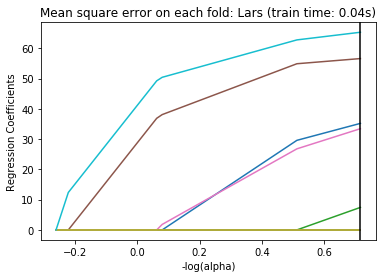

In [116]:
#plot coefficient progression
m_log_alphas = -np.log10(llcv.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, llcv.coef_path_.T)
plt.axvline(-np.log10(llcv.alpha_), linestyle='-', color = 'k', label = 'alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)' % t_lasso_lars_cv)
plt.show()

## Plot mean square error for each fold

/Users/dromescu/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


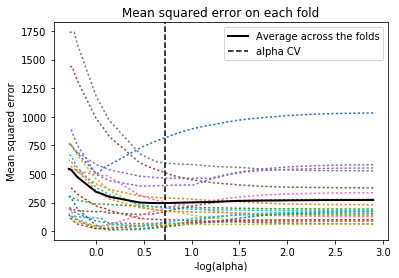

In [117]:
m_log_alphascv = -np.log10(llcv.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, llcv.cv_mse_path_, ':')
plt.plot(m_log_alphascv, llcv.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(llcv.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

## MSE from training and test data

In [118]:
train_error = mean_squared_error(tar_train, llcv.predict(pred_train))
test_error = mean_squared_error(tar_test, llcv.predict(pred_test))
print('MSE Training error: {} and Test error: {}'.format(train_error, test_error))

MSE Training error: 197.0003719153773 and Test error: 246.42009435058355


## R-square from training and test data

In [119]:
rsquared_train=llcv.score(pred_train,tar_train)
rsquared_test=llcv.score(pred_test,tar_test)

print('R-square Training error: {} and Test error: {}'.format(rsquared_train, rsquared_test))

R-square Training error: 0.636211201906431 and Test error: 0.5642247988373419


## Data Analysis:

Predictors with regression coefficients that do not have a value of zero are included in the selected model. Predictors with regression coefficients equal to zero means that the coefficients for those variables had shrunk to zero after applying the LASSO regression penalty, and were subsequently removed from the model. 

Python console results shows that of the 10 variables, 5 were selected in the final model.
So we can also use the size of the regression coefficients to tell us which predictors are the strongest predictors of breast cancer incidence. For example, urban rate and alcohol consumption had the largest regression coefficients, and were most strongly associated with breast cancer incidence, followed by life expectancy and CO2 emissions.
From the first plot we can see the relative importance of the predictor selected at any step of the selection process, how the regression coefficients changed with the addition of a new predictor at each step, as well as the steps at which each variable entered the model. 
The second plot shows the change in the mean square error for the change in the penalty parameter alpha at each step in the selection process.
The R-square values were 0.64 and 0.56, indicating that the selected model explained 64% and 56% of the variance in breast cancer incidence for the training and test sets, respectively. 